In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE=32
IMAGE_SIZE=256 #image size will be 256x256
CHANNELS=3 #we will use rgb image for this dataset
EPOCHS=5

In [4]:
# Set the desired number of training samples
num_training_samples = 1500

In [6]:

# Create a dataset with the entire dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "./../Dataset/",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    seed=42  # Set seed for reproducibility
)


Found 14946 files belonging to 3 classes.


In [7]:
# Take a subset of the dataset for training
train_dataset = dataset.take(num_training_samples // BATCH_SIZE)

In [8]:
# name of the 3 class belong to the directory
classes_name=dataset.class_names
classes_name

['Boot', 'Sandal', 'Shoe']

(32, 256, 256, 3)
[0 0 1 1 1 1 2 0 0 2 2 1 2 2 0 0 1 0 2 0 0 2 0 0 1 0 0 1 0 0 1 1]


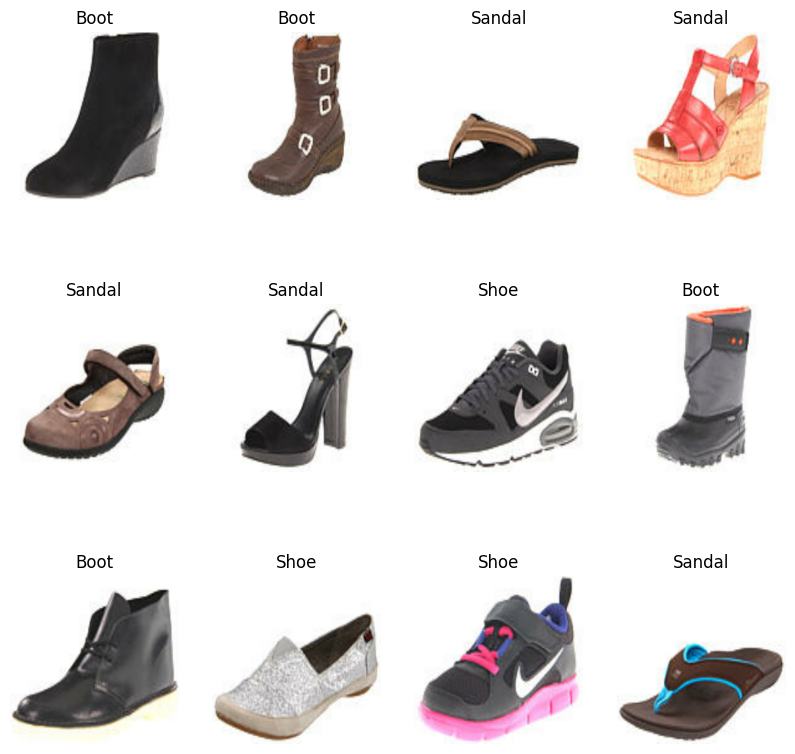

In [9]:
plt.figure(figsize=(10,10))

for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(classes_name[labels_batch[i]])
        plt.axis("off")

In [10]:
def get_dataset_partition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    assert(train_split+val_split+test_split) ==1
    ds_size=len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)

    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [11]:
train_ds,val_ds,test_ds=get_dataset_partition(dataset)

In [12]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].numpy())
    print(image_batch[0].numpy().shape)

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
(256, 256, 3)


In [14]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [15]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [16]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

model.build(input_shape=input_shape)

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [18]:
# Train the model with the subset of the dataset
model.fit(train_dataset, epochs=10)

Epoch 1/10
46/46 [==============================] - 148s 3s/step - loss: 1.0925 - accuracy: 0.3702
Epoch 2/10
46/46 [==============================] - 134s 3s/step - loss: 1.0548 - accuracy: 0.4226
Epoch 3/10
46/46 [==============================] - 108s 2s/step - loss: 0.9253 - accuracy: 0.5462
Epoch 4/10
46/46 [==============================] - 142s 3s/step - loss: 0.8421 - accuracy: 0.5992
Epoch 5/10
46/46 [==============================] - 143s 3s/step - loss: 0.7877 - accuracy: 0.6447
Epoch 6/10
46/46 [==============================] - 108s 2s/step - loss: 0.7407 - accuracy: 0.6719
Epoch 7/10
46/46 [==============================] - 68s 1s/step - loss: 0.7703 - accuracy: 0.6522
Epoch 8/10
46/46 [==============================] - 69s 2s/step - loss: 0.7032 - accuracy: 0.6773
Epoch 9/10
46/46 [==============================] - 66s 1s/step - loss: 0.6737 - accuracy: 0.7113
Epoch 10/10
46/46 [==============================] - 69s 1s/step - loss: 0.6731 - accuracy: 0.6834
